In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from folium.plugins import HeatMap
from matplotlib import pyplot as plt

In [12]:
original_Jimmy= pd.read_csv('C:/Users/user/Desktop/Cohort 10/Python/Data/cleaned_missed_pickups.csv')
original_Jimmy.dtypes

Request Number         int64
Date Opened           object
Request               object
Description           object
Incident Address      object
Zip Code             float64
Trash Hauler          object
Trash Route           object
Council District     float64
State Plan X         float64
State Plan Y         float64
description_clean     object
Street Name           object
dtype: object

In [13]:
trash_hauler_filtered= original_Jimmy[original_Jimmy['Trash Hauler'] == 'RED RIVER']
trash_hauler_filtered.head()

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,description_clean,Street Name
0,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,curb/trash miss tuesday.,Clarksville Pike
1,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,curb/trash miss tuesday.,Thunderbird Dr
3,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 Croley Dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,missed the even side of the road.,Croley Dr
5,25330,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732,missed.,Lavergne Couchville Pike
7,25341,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed trash pickup - resident has at curb for...,3113 Hydes Ferry Rd,37218.0,RED RIVER,4204,2.0,1.721578e+06,676018.399900,missed trash pickup - resident has at curb for...,Hydes Ferry Rd


In [14]:
trash_hauler_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12718 entries, 0 to 17559
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request Number     12718 non-null  int64  
 1   Date Opened        12718 non-null  object 
 2   Request            12718 non-null  object 
 3   Description        12699 non-null  object 
 4   Incident Address   12718 non-null  object 
 5   Zip Code           12705 non-null  float64
 6   Trash Hauler       12718 non-null  object 
 7   Trash Route        12716 non-null  object 
 8   Council District   12714 non-null  float64
 9   State Plan X       12713 non-null  float64
 10  State Plan Y       12713 non-null  float64
 11  description_clean  12697 non-null  object 
 12  Street Name        12718 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [20]:
Missed_trash_missed_count=trash_hauler_filtered.groupby(['Street Name', 'Zip Code']).size().reset_index(name='Missed Count')
Missed_trash_missed_count.head()

,Street Name,Zip Code,Missed Count
0,11th Ave N Nashville Tennessee 37208,37208.0,1
1,11th Ave N Nashville Tn 37208 United States,37208.0,4
2,12th Ave N,37208.0,3
3,12th Ave N Nashville Tn 37208 United States,37208.0,3
4,14th Ave N,37208.0,7


In [21]:
Missed_trash_missed_count['Fine']=Missed_trash_missed_count['Missed Count'].apply(lambda x: (x - 1) * 200 if x > 1 else 0)
Missed_trash_missed_count

,Street Name,Zip Code,Missed Count,Fine
0,11th Ave N Nashville Tennessee 37208,37208.0,1,0
1,11th Ave N Nashville Tn 37208 United States,37208.0,4,600
2,12th Ave N,37208.0,3,400
3,12th Ave N Nashville Tn 37208 United States,37208.0,3,400
4,14th Ave N,37208.0,7,1200
...,...,...,...,...
4175,Youngs Ln 37207,37207.0,1,0
4176,Youngs Ln A,37207.0,1,0
4177,Youngs Ln Nashville Tn 37207 United States,37207.0,10,1800
4178,Yowell Ave Madison Tennessee 37115,37115.0,2,200


In [22]:
total_fines= Missed_trash_missed_count['Fine'].sum()
print(total_fines)

1705000


In [29]:
#pd.reset_option('display.max_rows')
Missed_trash_missed_count

,Street Name,Zip Code,Missed Count,Fine
0,11th Ave N Nashville Tennessee 37208,37208.0,1,0
1,11th Ave N Nashville Tn 37208 United States,37208.0,4,600
2,12th Ave N,37208.0,3,400
3,12th Ave N Nashville Tn 37208 United States,37208.0,3,400
4,14th Ave N,37208.0,7,1200
...,...,...,...,...
4175,Youngs Ln 37207,37207.0,1,0
4176,Youngs Ln A,37207.0,1,0
4177,Youngs Ln Nashville Tn 37207 United States,37207.0,10,1800
4178,Yowell Ave Madison Tennessee 37115,37115.0,2,200


Number of Missed Trash Pickup per Zip code Heat Map

In [40]:
missed_count_hm= Missed_trash_missed_count[['Zip Code', 'Missed Count']]
missed_count_hm= missed_count_hm.groupby("Zip Code")["Missed Count"].sum().reset_index()
missed_count_hm.head()

,Zip Code,Missed Count
0,37013.0,1994
1,37027.0,137
2,37086.0,3
3,37115.0,1007
4,37189.0,54


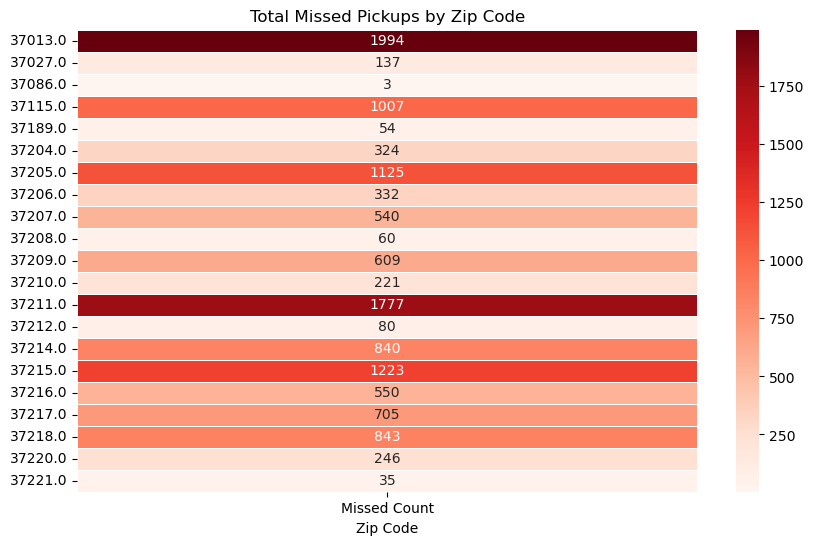

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(missed_count_hm.set_index("Zip Code"), cmap="Reds", annot=True, fmt="d", linewidths=0.5)
plt.title("Total Missed Pickups by Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("")
plt.show()

Fines per Zip code Heat Map

In [45]:
missed_fine_hm= Missed_trash_missed_count[['Zip Code', 'Fine']]
missed_fine_hm= missed_fine_hm.groupby("Zip Code")["Fine"].sum().reset_index()
missed_fine_hm.head()

,Zip Code,Fine
0,37013.0,250400
1,37027.0,13200
2,37086.0,200
3,37115.0,146000
4,37189.0,6600


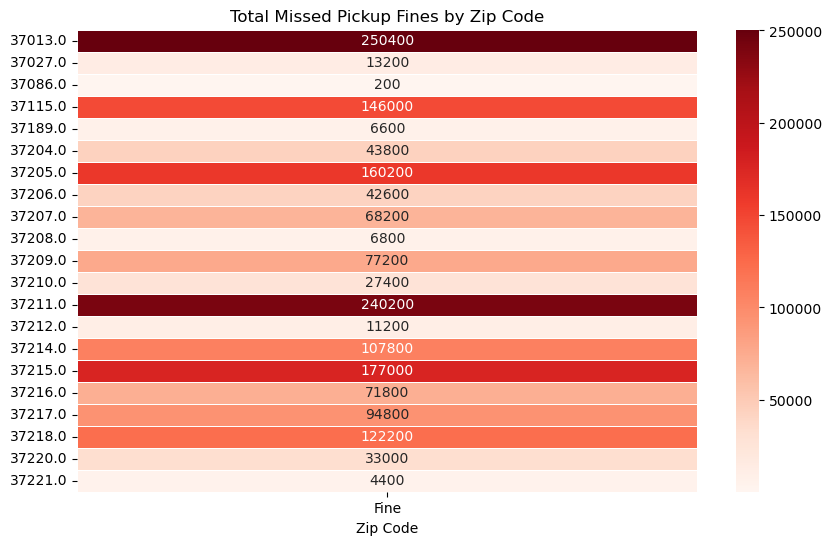

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(missed_fine_hm.set_index("Zip Code"), cmap="Reds", annot=True, fmt="d", linewidths=0.5)
plt.title("Total Missed Pickup Fines by Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("")
plt.show()

How do metro crews compare to the contractor's performance?
How much does each trash hauler owe?
What were to total missed pickup by route?

In [58]:
original_Jimmy['Trash Hauler'].unique()

array(['RED RIVER', 'WASTE IND', 'Metro', nan], dtype=object)

In [57]:
original_Jimmy['Trash Hauler'] = original_Jimmy['Trash Hauler'].replace({'METRO': 'Metro'})
Metro_RR = original_Jimmy[original_Jimmy['Trash Hauler'].isin(['Metro', 'RED RIVER'])].reset_index()
Metro_RR.head()

,index,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,description_clean,Street Name
0,0,25274,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565,curb/trash miss tuesday.,Clarksville Pike
1,1,25276,2017-11-01,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571,curb/trash miss tuesday.,Thunderbird Dr
2,3,25312,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 Croley Dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066,missed the even side of the road.,Croley Dr
3,4,25327,2017-11-01,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,Metro,9208,21.0,1.731459e+06,666013.601229,"trash out on time, miss again tuesday. alley",Jo Johnston Ave
4,5,25330,2017-11-01,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732,missed.,Lavergne Couchville Pike


In [61]:
#Filtered out other trash haulers besides Metro and Red River. Could be made into a graph. It seems like Metro does a better job
#than Red River
Metro_RR_graph_setup= Metro_RR.groupby("Trash Hauler").size().reset_index(name='Missed Count')
Metro_RR_graph_setup

,Trash Hauler,Missed Count
0,Metro,3005
1,RED RIVER,12718


In [63]:
Metro_RR_graph_setup['Fine']=Metro_RR_graph_setup['Missed Count'].apply(lambda x: (x - 1) * 200 if x > 1 else 0)
Metro_RR_graph_setup

,Trash Hauler,Missed Count,Fine
0,Metro,3005,600800
1,RED RIVER,12718,2543400
